In [2]:
from textblob import TextBlob
import pandas as pd
import re
import nltk
import string
import tweepy
import numpy as np

In [64]:
dataset = pd.read_csv('final.csv' , encoding='mac_roman', engine='python')

In [57]:
df= pd.read_csv('dataset.csv' , encoding='mac_roman', engine='python')
df = df.head(5)

In [58]:
import re

In [65]:
df['tweet_processed'] = df['tweets'].map(lambda x: re.sub('[,\\.!?]', '', x)) #remove special characters 
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,Completely healthy 19 year old develops life t...
1,I see #FauciDogTorturer trending. Beagles are ...,I see #FauciDogTorturer trending Beagles are r...
2,30 million doses of #CovidVaccine ready to go ...,30 million doses of #CovidVaccine ready to go ...
3,The world isn't just battling the coronavirus ...,The world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,Not good news for ppl on anti-CD20 meds #Ritux...


In [66]:
df['tweet_processed'] = df['tweet_processed'].map(lambda x: x.lower()) #change to lowercase
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,completely healthy 19 year old develops life t...
1,I see #FauciDogTorturer trending. Beagles are ...,i see #faucidogtorturer trending beagles are r...
2,30 million doses of #CovidVaccine ready to go ...,30 million doses of #covidvaccine ready to go ...
3,The world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,not good news for ppl on anti-cd20 meds #ritux...


In [67]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'#' , '', x)) #remove hashtags 
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,completely healthy 19 year old develops life t...
1,I see #FauciDogTorturer trending. Beagles are ...,i see faucidogtorturer trending beagles are ro...
2,30 million doses of #CovidVaccine ready to go ...,30 million doses of covidvaccine ready to go f...
3,The world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,not good news for ppl on anti-cd20 meds rituxi...


In [68]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'@[^\s]*', "" , x)) #remove mentions 
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,completely healthy 19 year old develops life t...
1,I see #FauciDogTorturer trending. Beagles are ...,i see faucidogtorturer trending beagles are ro...
2,30 million doses of #CovidVaccine ready to go ...,30 million doses of covidvaccine ready to go f...
3,The world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,not good news for ppl on anti-cd20 meds rituxi...


In [69]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x)) #remove links 
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,completely healthy 19 year old develops life t...
1,I see #FauciDogTorturer trending. Beagles are ...,i see faucidogtorturer trending beagles are ro...
2,30 million doses of #CovidVaccine ready to go ...,30 million doses of covidvaccine ready to go f...
3,The world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,not good news for ppl on anti-cd20 meds rituxi...


In [70]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,completely healthy year old develops life thr...
1,I see #FauciDogTorturer trending. Beagles are ...,i see faucidogtorturer trending beagles are ro...
2,30 million doses of #CovidVaccine ready to go ...,million doses of covidvaccine ready to go for...
3,The world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,not good news for ppl on anti-cd meds rituxima...


In [72]:
df.tweet_processed = df['tweet_processed'].map(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x)) #remove links
df

,tweets,tweet_processed
0,Completely healthy 19 year old develops life t...,completely healthy year old develops life thr...
1,I see #FauciDogTorturer trending. Beagles are ...,i see faucidogtorturer trending beagles are ro...
2,30 million doses of #CovidVaccine ready to go ...,million doses of covidvaccine ready to go for...
3,The world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,Not good news for ppl on anti-CD20 meds. #Ritu...,not good news for ppl on anti-cd meds rituxima...


In [73]:
dataset = pd.read_csv('final.csv' , encoding='mac_roman', engine='python')
df = dataset

### Removing unwanted tweets - Remove tweets with less than 5 words

In [21]:
import nltk

from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
df_clean = df 
df_clean['token'] = df_clean['tweet_processed']
df_clean

,tweet_processed,token
0,completely healthy year old develops life thr...,completely healthy year old develops life thr...
1,i see faucidogtorturer trending beagles are ro...,i see faucidogtorturer trending beagles are ro...
2,million doses of covidvaccine ready to go for...,million doses of covidvaccine ready to go for...
3,the world isn't just battling the coronavirus ...,the world isn't just battling the coronavirus ...
4,not good news for ppl on anti-cd meds rituxima...,not good news for ppl on anti-cd meds rituxima...
...,...,...
1906,if they put vaccine in liquor half the populat...,if they put vaccine in liquor half the populat...
1907,south africa wants to return india's vaccines ...,south africa wants to return india's vaccines ...
1908,india sends free covaxin covishield vaccines t...,india sends free covaxin covishield vaccines t...
1909,india is yet to endorse sputnikv as usual euro...,india is yet to endorse sputnikv as usual euro...


In [23]:
df_clean['token'].str.lower().str.split()

0       [completely, healthy, year, old, develops, lif...
1       [i, see, faucidogtorturer, trending, beagles, ...
2       [million, doses, of, covidvaccine, ready, to, ...
3       [the, world, isn't, just, battling, the, coron...
4       [not, good, news, for, ppl, on, anti-cd, meds,...
                              ...                        
1906    [if, they, put, vaccine, in, liquor, half, the...
1907    [south, africa, wants, to, return, india's, va...
1908    [india, sends, free, covaxin, covishield, vacc...
1909    [india, is, yet, to, endorse, sputnikv, as, us...
1910    [covid, southafrican, variant, detected, in, i...
Name: token, Length: 1911, dtype: object

In [24]:
df_clean['token'] = df_clean['token'].str.split().apply(lambda x: [item for item in x if item not in stopwords.words('english')])

In [25]:
for i in range (0,len(df_clean)):
    if(len(df_clean['token'][i]))<5: 
        df_clean['token'][i] = [] 

In [26]:
df_clean=df_clean[df_clean.astype(str)['token'] != '[]'].reset_index(drop=True)

In [27]:
df_clean

,tweet_processed,token
0,completely healthy year old develops life thr...,"[completely, healthy, year, old, develops, lif..."
1,i see faucidogtorturer trending beagles are ro...,"[see, faucidogtorturer, trending, beagles, rou..."
2,million doses of covidvaccine ready to go for...,"[million, doses, covidvaccine, ready, go, scho..."
3,the world isn't just battling the coronavirus ...,"[world, battling, coronavirus, anymore, also, ..."
4,not good news for ppl on anti-cd meds rituxima...,"[good, news, ppl, anti-cd, meds, rituximab, ri..."
...,...,...
1797,if they put vaccine in liquor half the populat...,"[put, vaccine, liquor, half, population, would..."
1798,south africa wants to return india's vaccines ...,"[south, africa, wants, return, india's, vaccin..."
1799,india sends free covaxin covishield vaccines t...,"[india, sends, free, covaxin, covishield, vacc..."
1800,india is yet to endorse sputnikv as usual euro...,"[india, yet, endorse, sputnikv, usual, europea..."


### Topic Modelling

In [28]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [29]:
data = df_clean.tweet_processed.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
data = [re.sub(r'https?:\/\/.*[\r\n]*', '', sent) for sent in data]

In [30]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        
data_words = list(sent_to_words(data))
print(data_words[:1])

[['completely', 'healthy', 'year', 'old', 'develops', 'life', 'threatening', 'blood', 'disorder', 'causing', 'her', 'to', 'bleed', 'out', 'after', 'covidvaccine', 'now', 'must', 'spend', 'the', 'rest', 'of', 'her', 'life', 'in', 'hospital', 'get', 'blood', 'transfusions']]


In [31]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [32]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb


In [33]:
data_lemmatized[0]

'year develop life threaten blood disorder cause bleed covidvaccine spend rest life hospital get blood transfusion'

#### The LDA topic model algorithm requires a document word matrix as the main input.

In [34]:
vectorizer = CountVectorizer(analyzer='word',       min_df=10,
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=50000 )
data_vectorized = vectorizer.fit_transform(data_lemmatized) #document-word matrix

In [35]:
data_dense = data_vectorized.todense()

In [36]:
data_vectorized

<1802x284 sparse matrix of type '<class 'numpy.int64'>'
	with 8207 stored elements in Compressed Sparse Row format>

In [37]:
lda_model = LatentDirichletAllocation(n_components=7,               
                                      max_iter=10,               
                                      learning_method='online',   
                                      random_state=100,          
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,                                                    )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', n_components=7, n_jobs=-1,
                          random_state=100)


In [38]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.9,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=7, n_jobs=-1, perp_tol=0.1,
             random_state=100, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(learning_decay=0.9, learning_method='online',
                          n_components=7, n_jobs=-1, random_state=100)

In [39]:
print("Log Likelihood: ", lda_model.score(data_vectorized))
pprint(lda_model.get_params())
print("Perplexity: ", lda_model.perplexity(data_vectorized))


Log Likelihood:  -48474.198227866415
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 7,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}
Perplexity:  250.98282263369958


In [40]:
# Create Document — Topic Matrix
lda_output = lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [41]:
#GridSearch to determine the best LDA model.
search_params = {'n_components': [7,10,12], 'learning_decay': [0.5,0.7,0.9]}
# Init the Model
lda = LatentDirichletAllocation()
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [7, 10, 12]})

In [42]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.9, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=7, n_jobs=1,
             perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),n_jobs=1,
       param_grid={'n_topics': [7, 10, 12], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_decay=0.9,
                                                 learning_method=None,
                                                 n_components=7, n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [7, 10, 12]},
             return_train_score='warn')

In [43]:
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Paramater: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Paramater:  {'learning_decay': 0.7, 'n_components': 7}
Best Log Likelihood Score:  -12058.966248762908
Model Perplexity:  238.03102839653874


In [44]:
# Get Log Likelyhoods from Grid Search Output
from sklearn.model_selection import GridSearchCV

n_topics = [7, 10,12]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

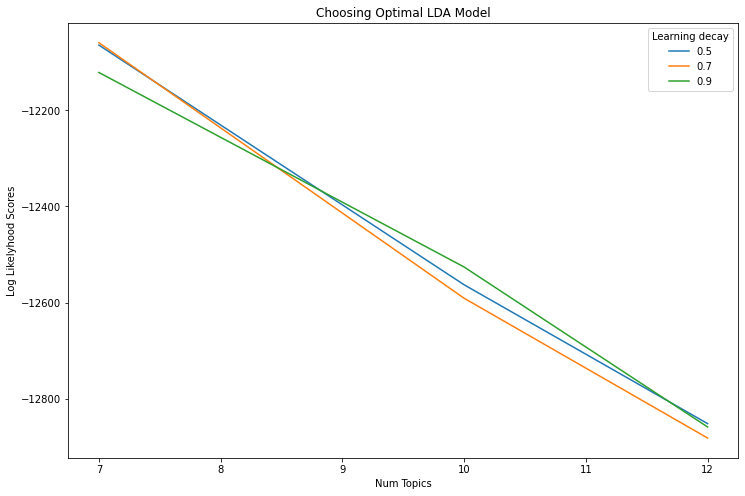

In [46]:
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [47]:
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [48]:
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)

df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic
Doc0,0.880000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0
Doc1,0.020000,0.020000,0.890000,0.020000,0.020000,0.020000,0.020000,2
Doc2,0.020000,0.020000,0.380000,0.020000,0.020000,0.020000,0.520000,6
Doc3,0.020000,0.020000,0.200000,0.700000,0.020000,0.020000,0.020000,3
Doc4,0.830000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0
Doc5,0.020000,0.020000,0.760000,0.020000,0.150000,0.020000,0.020000,2
Doc6,0.400000,0.010000,0.440000,0.010000,0.120000,0.010000,0.010000,2
Doc7,0.150000,0.020000,0.760000,0.020000,0.020000,0.020000,0.020000,2
Doc8,0.040000,0.040000,0.040000,0.040000,0.040000,0.040000,0.790000,6
Doc9,0.010000,0.320000,0.610000,0.010000,0.010000,0.010000,0.010000,2


In [49]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,342
1,3,279
2,1,262
3,0,239
4,4,236
5,6,224
6,5,220


In [50]:
import pyLDAvis
import pyLDAvis.sklearn

In [51]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\Users\aparn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
C:\Users\aparn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2     -29.594002  60.112713       1        1  18.430852
3     -45.996586  11.891685       2        1  15.261459
6      20.368856  70.019325       3        1  14.526677
1      53.928768  31.704309       4        1  14.445209
5     -12.437127 -26.423267       5        1  13.098676
4       3.965971  21.797720       6        1  12.747118
0      37.524284 -16.517805       7        1  11.490009, topic_info=             Term        Freq       Total Category  logprob  loglift
168      pandemic  169.000000  169.000000  Default  30.0000  30.0000
48   covidvaccine  310.000000  310.000000  Default  29.0000  29.0000
263       vaccine  244.000000  244.000000  Default  28.0000  28.0000
23           case  126.000000  126.000000  Default  27.0000  27.0000
273          wave  106.000000  106.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
214           say   19.255147   86.329746   Topic7  -3.9580   0.6633
119     infection   12.331625   38.327912   Topic7  -4.4036   1.0297
42    coronavirus   17.958867  161.678272   Topic7  -4.0277  -0.0338
132          life   13.680111   73.676766   Topic7  -4.2998   0.4799
274           way   10.340198   32.739406   Topic7  -4.5797   1.0112

[319 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.209798   accord
0         2  0.629393   accord
0         7  0.139865   accord
1         1  0.761459  achieve
1         5  0.095182  achieve
...     ...       ...      ...
283       1  0.275550     year
283       2  0.137775     year
283       3  0.195182     year
283       6  0.011481     year
283       7  0.378882     year

[557 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 7, 2, 6, 5, 1])

In [75]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords

,accord,achieve,act,affect,age,amp,announce,approve,area,article,...,way,wear,week,wfh,win,woman,work,worker,world,year
Topic0,1.723453,0.143088,0.143594,0.142858,0.142975,0.143095,0.143435,0.143191,0.142857,0.143313,...,10.414407,0.143109,0.143390,0.142894,0.142857,0.143059,0.143164,0.142913,0.143033,33.131956
Topic1,0.142954,0.142857,0.143033,13.982927,0.142914,12.657796,0.142858,0.142857,16.141889,0.142945,...,0.142963,0.142926,13.052175,28.142080,0.142954,0.143105,56.650834,0.142916,13.069575,0.143404
Topic2,3.454782,8.944875,0.142857,0.143113,0.665053,32.819092,2.863321,10.118769,0.142857,3.140654,...,4.548192,0.142882,9.470102,0.142942,0.142988,34.092930,10.751695,11.803132,6.540353,25.677918
Topic3,9.249270,0.143069,0.142867,0.143388,0.142921,12.956161,3.143251,1.166356,0.143087,7.144056,...,14.871717,0.142950,0.143142,0.143116,13.142416,1.192061,29.763570,0.143090,16.430096,12.613957
Topic4,0.143059,0.142857,0.143068,2.301701,0.142857,0.144686,6.078851,0.142956,0.143250,0.143012,...,0.143333,0.142897,0.143048,0.143044,0.142894,0.142918,16.404429,13.481473,0.143303,0.800265
Topic5,0.143237,1.340396,1.168674,0.143022,0.142911,12.051645,0.143469,0.142968,0.143178,0.142858,...,0.143101,0.142906,2.650739,0.143050,0.142895,0.142947,0.143154,0.143200,15.846786,0.143027
Topic6,0.143245,0.142857,12.115907,0.142990,20.620369,42.227525,2.484815,0.142903,0.142880,0.143161,...,3.736288,32.142330,7.397404,0.142874,0.142995,0.142979,0.143154,0.143276,34.826855,17.489472


In [76]:
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=7):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,covid,vaccine,covaxin,covidvaccine,vaccination,year,lockdown,study,save,covishield,news,stop,happen,immunity,dose,say,datum,death,govt,coronavirus
Topic 1,people,covid,work,oxygen,home,hospital,price,die,wfh,stay,end,thing,food,oil,spread,time,virus,shortage,death,start
Topic 2,covidvaccine,vaccine,covid,booster,woman,health,know,need,amp,make,child,shot,year,vaccinate,kid,rate,day,pfizer,fall,protect
Topic 3,pandemic,coronavirus,virus,day,impact,economy,test,work,make,bring,business,country,need,death,health,time,company,world,market,symptom
Topic 4,life,corona,fight,time,covid,support,thank,quarantine,doctor,let,change,today,panic,warrior,help,nurse,learn,day,hope,care
Topic 5,case,wave,covid,country,report,say,expert,rise,variant,increase,state,number,infection,surge,restriction,world,predict,death,store,hit
Topic 6,mask,covidvaccine,vaccination,today,dose,booster,stay,amp,world,wear,people,use,centre,lose,family,age,face,job,distancing,measure


In [77]:
Topics = ["health" , "cases" , "economy" ,"lockdown" , "work"  , "impact on people" , "vaccine"]
df_topic_keywords["Topics"]=Topics

In [78]:
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization
# Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))
# Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)
# Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 1:14].values.tolist()    
    # Step 5: Infer Topic
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    #topic_guess = df_topic_keywords.iloc[np.argmax(topic_probability_scores), Topics]
    return infer_topic, topic, topic_probability_scores
# Predict the topic


In [79]:
mytext=['the effectiveness of mrna covid vaccine pfizer in pregnant women is as strong as that in the general  population']
infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(mytext)
print(topic)
print(infer_topic)

['the effectiveness of mrna covid vaccine pfizer in pregnant women is as strong as that in the general  population']
['covidvaccine', 'vaccination', 'today', 'dose', 'booster', 'stay', 'amp', 'world', 'wear', 'people', 'use', 'centre', 'lose']
vaccine


In [81]:
def apply_predict_topic(text):
    text = [text]
    infer_topic, topic, prob_scores = predict_topic(text = text)
    return(infer_topic)
df["Topics"]= df['tweet_processed'].apply(apply_predict_topic)
df

,tweet_processed,Topics
0,completely healthy year old develops life thr...,vaccine
1,i see faucidogtorturer trending beagles are ro...,cases
2,million doses of covidvaccine ready to go for...,vaccine
3,the world isn't just battling the coronavirus ...,work
4,not good news for ppl on anti-cd meds rituxima...,health
...,...,...
1906,"If they put vaccine in liquor, half the popula...",work
1907,South Africa wants to return India's vaccines ...,work
1908,India sends free Covaxin Covishield vaccines t...,cases
1909,India is yet to endorse SputnikV As usual Euro...,cases


In [82]:
df.loc[df['Topics'] == 'cases']

,tweet_processed,Topics
1,i see faucidogtorturer trending beagles are ro...,cases
17,the benefits of vaccination for most young peo...,cases
28,rural bengaluru covidvaccine availability for...,cases
43,does molly understand anything about gillickc...,cases
45,uttar pradesh government is now planning to sh...,cases
...,...,...
1904,COVID19 Coronavirusvaccine Covaxin Covishield ...,cases
1905,COVAXIN or CovishieldVaccine Both are safe. Tw...,cases
1908,India sends free Covaxin Covishield vaccines t...,cases
1909,India is yet to endorse SputnikV As usual Euro...,cases


In [445]:
df["Topics"].value_counts()

lockdown            325
work                318
vaccine             314
impact on people    291
health              274
cases               225
economy             164
Name: Topics, dtype: int64

In [449]:
df = df.sort_values(by=['Topics'])

In [450]:
header = ['tweet_processed','Topics']

In [451]:
df.to_csv('lda_op.csv' , columns=header)

### Module 3: Sentiment Analysis

### Annotation 

In [83]:
df = pd.read_csv('ldaop.csv' , encoding = 'latin', engine='python')
df

,Unnamed: 0,tweet_processed,Topics
0,1910,covid southafrican variant detected in india h...,cases
1,362,this data sadly will now become a political fo...,cases
2,361,it's not over covidcrisis covid publicinquiry ...,cases
3,1223,corona dose not to feel only to listen,cases
4,353,keeping our drivers and customers safe with ou...,cases
...,...,...,...
1906,436,in view of the continuous dip in coronavirus c...,work
1907,1786,vadodara covid tally reaches with new cases ...,work
1908,67,uk suffered new deltavariant cases and new d...,work
1909,1116,my last selfie before lockdown with my team at...,work


### Assign Sentiment 

In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [85]:
sid_obj= SentimentIntensityAnalyzer()


In [86]:
def calculate_sentiment(tweet):     
    x = sid_obj.polarity_scores(tweet)['compound']
    if x >=0.45: 
        return 'positive' 
    else : 
        return 'negative'
    

In [87]:
df.head()

,Unnamed: 0,tweet_processed,Topics
0,1910,covid southafrican variant detected in india h...,cases
1,362,this data sadly will now become a political fo...,cases
2,361,it's not over covidcrisis covid publicinquiry ...,cases
3,1223,corona dose not to feel only to listen,cases
4,353,keeping our drivers and customers safe with ou...,cases


In [88]:
df['sentiment'] = df['tweet_processed'].map(lambda x : calculate_sentiment(x))

In [89]:
df

,Unnamed: 0,tweet_processed,Topics,sentiment
0,1910,covid southafrican variant detected in india h...,cases,positive
1,362,this data sadly will now become a political fo...,cases,negative
2,361,it's not over covidcrisis covid publicinquiry ...,cases,negative
3,1223,corona dose not to feel only to listen,cases,negative
4,353,keeping our drivers and customers safe with ou...,cases,positive
...,...,...,...,...
1906,436,in view of the continuous dip in coronavirus c...,work,negative
1907,1786,vadodara covid tally reaches with new cases ...,work,negative
1908,67,uk suffered new deltavariant cases and new d...,work,negative
1909,1116,my last selfie before lockdown with my team at...,work,negative


### Inference from dataset

In [90]:
df.groupby(["Topics", "sentiment"]).size()

Topics            sentiment
cases             negative     186
                  positive      39
economy           negative     233
                  positive      58
health            negative     190
                  positive      84
impact on people  negative     251
                  positive      74
lockdown          negative     234
                  positive      84
vaccine           negative     226
                  positive      88
work              negative     136
                  positive      28
dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [92]:
stop_words = set(stopwords.words('english'))


In [93]:
data = df[['tweet_processed','sentiment']]


In [94]:
data

,tweet_processed,sentiment
0,covid southafrican variant detected in india h...,positive
1,this data sadly will now become a political fo...,negative
2,it's not over covidcrisis covid publicinquiry ...,negative
3,corona dose not to feel only to listen,negative
4,keeping our drivers and customers safe with ou...,positive
...,...,...
1906,in view of the continuous dip in coronavirus c...,negative
1907,vadodara covid tally reaches with new cases ...,negative
1908,uk suffered new deltavariant cases and new d...,negative
1909,my last selfie before lockdown with my team at...,negative


In [95]:
def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = re.sub('\\n' ,' ',result)
    result = re.sub('\\r' ,' ',result)
    result = result.lower()
    return result
data['tweet_processed']=data['tweet_processed'].apply(lambda cw : remove_tags(cw))

C:\Users\aparn\AppData\Local\Temp/ipykernel_14300/3076939646.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_processed']=data['tweet_processed'].apply(lambda cw : remove_tags(cw))


In [96]:
data

,tweet_processed,sentiment
0,covid southafrican variant detected in india h...,positive
1,this data sadly will now become a political fo...,negative
2,it's not over covidcrisis covid publicinquiry ...,negative
3,corona dose not to feel only to listen,negative
4,keeping our drivers and customers safe with ou...,positive
...,...,...
1906,in view of the continuous dip in coronavirus c...,negative
1907,vadodara covid tally reaches with new cases ...,negative
1908,uk suffered new deltavariant cases and new d...,negative
1909,my last selfie before lockdown with my team at...,negative


In [97]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['tweet_processed'] = data.tweet_processed.apply(lemmatize_text)



C:\Users\aparn\AppData\Local\Temp/ipykernel_14300/3571705551.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_processed'] = data.tweet_processed.apply(lemmatize_text)


In [98]:
s = 0.0
for i in data['tweet_processed']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each tweet : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['sentiment'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of tweets with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of tweets with negative sentiment is "+str(neg/data.shape[0]*100)+"%")


Average length of each tweet :  21.272108843537413
Percentage of tweets with positive sentiment is 23.809523809523807%
Percentage of tweets with negative sentiment is 76.19047619047619%


In [99]:
tweets = data['tweet_processed'].values
labels = data['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [100]:
print(encoded_labels )
#1 pos
#0 neg


[1 0 0 ... 0 0 0]


In [101]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(tweets, encoded_labels, stratify = encoded_labels)


### LSTM using RNN

In [102]:
# Hyperparameters of the model
vocab_size = 700 
oov_tok = ''
embedding_dim = 50
max_length = 165 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [103]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 165, 50)           35000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 97,001
Trainable params: 97,001
Non-trainable params: 0
_________________________________________________________________


In [104]:
num_epochs = 10
history = model.fit(train_padded, train_labels,epochs=num_epochs, verbose=2,validation_split=0.1)

Epoch 1/10
41/41 - 6s - loss: 0.5865 - accuracy: 0.7665 - val_loss: 0.5997 - val_accuracy: 0.7153 - 6s/epoch - 141ms/step
Epoch 2/10
41/41 - 2s - loss: 0.5325 - accuracy: 0.7673 - val_loss: 0.6064 - val_accuracy: 0.7153 - 2s/epoch - 43ms/step
Epoch 3/10
41/41 - 2s - loss: 0.4723 - accuracy: 0.7750 - val_loss: 0.5776 - val_accuracy: 0.7292 - 2s/epoch - 43ms/step
Epoch 4/10
41/41 - 2s - loss: 0.3810 - accuracy: 0.8177 - val_loss: 0.5763 - val_accuracy: 0.7569 - 2s/epoch - 43ms/step
Epoch 5/10
41/41 - 2s - loss: 0.2871 - accuracy: 0.8790 - val_loss: 0.5911 - val_accuracy: 0.7500 - 2s/epoch - 44ms/step
Epoch 6/10
41/41 - 2s - loss: 0.2181 - accuracy: 0.9154 - val_loss: 0.6514 - val_accuracy: 0.7500 - 2s/epoch - 44ms/step
Epoch 7/10
41/41 - 2s - loss: 0.1622 - accuracy: 0.9403 - val_loss: 0.7758 - val_accuracy: 0.7569 - 2s/epoch - 43ms/step
Epoch 8/10
41/41 - 2s - loss: 0.1132 - accuracy: 0.9628 - val_loss: 0.9134 - val_accuracy: 0.7986 - 2s/epoch - 43ms/step
Epoch 9/10
41/41 - 2s - loss: 0

In [128]:
prediction = model.predict(test_padded)
pred_labels = []
for i in prediction:
    if i >=0.93:
        pred_labels.append(1)   
    else :
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))
acc1 = accuracy_score(test_labels,pred_labels)*100

Accuracy of prediction on test set :  0.7949790794979079


In [123]:
test_sent = ['uk suffered new deltavariant cases and new deaths on october of everyone irrespective of age covidvaccine failure' , 'the effectiveness of mrna covidvaccine in pregnant women is as strong as that in the general  population']
test_sent = np.array(test_sent)
test_seq = tokenizer.texts_to_sequences(test_sent)
test_pad = pad_sequences(test_seq, padding='post', maxlen=max_length)
test_pad = np.array(test_pad)


In [124]:
preditionsTest = model.predict(test_pad)

In [126]:
for i in preditionsTest:
    if i >=0.5:
        print('Positive')   
    else :
        print('Negative')

Negative
Positive


### MultiNomial Naive Bayes


In [127]:
x = data['tweet_processed']
y = data['sentiment']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.1, random_state=42)

In [492]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [493]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [494]:
model.score(x_test, y_test)

0.828125

In [495]:
model.predict(vec.transform(['the effectiveness of mrna covidvaccine in pregnant women is as strong as that in the general  population']))


array(['positive'], dtype='<U8')

### Other ML classifiers

In [129]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
X = data['tweet_processed']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =26105111)
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  28204


#### Vectorize data before classification

In [131]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [132]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['positive' , ' negative']
    group_names = ['True Pos','False Neg','True Neg','False Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1} {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## Naive Bayes

              precision    recall  f1-score   support

    negative       0.74      1.00      0.85       141
    positive       1.00      0.02      0.04        51

    accuracy                           0.74       192
   macro avg       0.87      0.51      0.44       192
weighted avg       0.81      0.74      0.63       192



array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negati

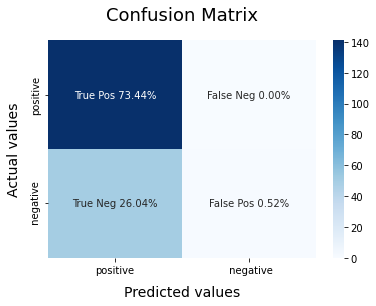

In [133]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
y_pred1

In [501]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y = data['sentiment']
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
clf = BernoulliNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

### Linear Regression

              precision    recall  f1-score   support

    negative       0.80      0.99      0.89       144
    positive       0.92      0.25      0.39        48

    accuracy                           0.81       192
   macro avg       0.86      0.62      0.64       192
weighted avg       0.83      0.81      0.76       192



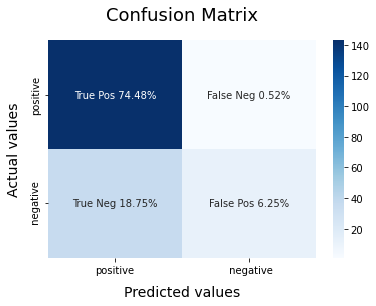

In [503]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

### KNN

              precision    recall  f1-score   support

    negative       0.79      0.90      0.84       144
    positive       0.50      0.29      0.37        48

    accuracy                           0.75       192
   macro avg       0.65      0.60      0.61       192
weighted avg       0.72      0.75      0.73       192



0.75

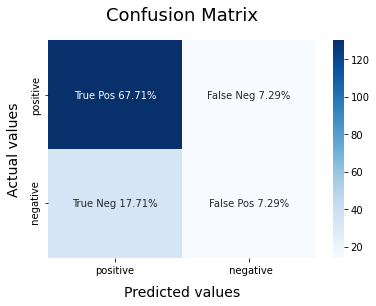

In [504]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
model_Evaluate(KNN)
y_pred4 = KNN.predict(X_test)
accuracy_score(y_test, y_pred4)

              precision    recall  f1-score   support

    negative       0.79      0.89      0.83       141
    positive       0.52      0.33      0.40        51

    accuracy                           0.74       192
   macro avg       0.65      0.61      0.62       192
weighted avg       0.71      0.74      0.72       192



0.7395833333333334

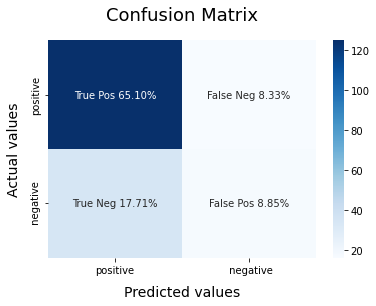

In [134]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
model_Evaluate(KNN)
y_pred4 = KNN.predict(X_test)
accuracy_score(y_test, y_pred4)

### Comparing performance

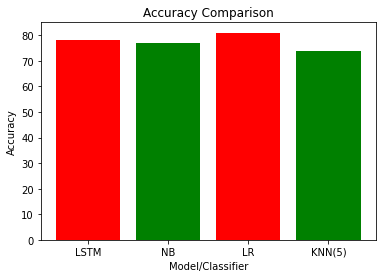

In [771]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4]

# heights of bars
height = [79,74,81,75,74]

# labels for bars
tick_label = ['LSTM', 'NB', 'LR', 'KNN(5)' , 'KNN(3)']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Model/Classifier')
# naming the y-axis
plt.ylabel('Accuracy')
# plot title
plt.title('Accuracy Comparison')

# function to show the plot
plt.show()


### Summarisation

In [136]:
dfs = pd.read_csv('lda_op.csv')
dfs['tweet_processed'] = dfs['tweet_processed'] + '.'

In [137]:
dfs

,Unnamed: 0,tweet_processed,Topics
0,1398.0,hand hygiene is one of the most effective acti...,cases
1,1910.0,covid south african variant detected in india ...,cases
2,1908.0,india sends free covaxin covishield vaccines t...,cases
3,401.0,omicron ba sub-variant nearly a quarter of new...,cases
4,705.0,deltacron variant of covid- reaches india.,cases
...,...,...,...
1902,267.0,covid completely killed every other virus and ...,work
1903,271.0,there is need for big pharma companies partic...,work
1904,276.0,we have many unnatural elements come into our ...,work
1905,1244.0,t - triumph yes we will triumph over pandemic.,work


In [138]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
Topics = ["health" , "cases" , "economy" ,"lockdown" , "work"  , "impact on people" , "vaccine"]
sentences = [] 
for topic in Topics:     
    x = str(dfs['tweet_processed'].loc[dfs['Topics'] == topic])
    pattern = r'[0-9]'
    y = re.sub(pattern, '', x)
    y = re.sub("\\n","",y)
    y = re.sub(' +', ' ', y)
    sentences.append(y)

In [139]:
for i in range(0,len(sentences)):
    sentences[i] = sentences[i].replace("\\n" , " ")


In [140]:
import regex as re

In [141]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

C:\Users\aparn\anaconda3\lib\site-packages\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


In [142]:
def clean(x):
    x = re.sub('[#,\\!?=()]', '', x) #remove special characters 
    x = re.sub('\\n', '', x) #remove special characters 
    x = re.sub('\\r', '', x) #remove special characters 
    x = re.sub("\\n"," " , x)
    x= re.sub(' +', ' ', x)
    return x 


In [143]:
for i in range (0,len(sentences)): 
    sentences[i] = clean(sentences[i])

In [144]:
T5_PATH = 't5-large' # T5 model name

# initialize the model architecture and weights

t5_model = T5ForConditionalGeneration.from_pretrained(T5_PATH)

# initialize the model tokenizer

t5_tokenizer = T5Tokenizer.from_pretrained(T5_PATH)

In [145]:
def generate_summary1(tweet_data):
    #from transformers import T5Tokenizer, T5ForConditionalGeneration
    model = T5ForConditionalGeneration.from_pretrained('t5-base')
    tokenizer = T5Tokenizer.from_pretrained('t5-base')
    text = tweet_data
    Preprocessed_text = "Summary: "+ text 
    tokens_input = tokenizer.encode(Preprocessed_text,return_tensors="pt", max_length=10000, truncation=True)
    summary_ids = model.generate(tokens_input, min_length=45,max_length=450,length_penalty=4)
    summary = tokenizer.decode(summary_ids[0])

    #print(summary)
    def remove_unwanted(text):
        text = re.sub(r'<extra_id_1>', "" , text) 
        text = text.lstrip('<pad>')
        text = re.sub(r'</s>', "" , text) 
        return text
    final = remove_unwanted(summary)
    
    print(final)
    return final

### Using Pipeline

In [146]:
import transformers
from transformers import pipeline

In [147]:
summarizer = pipeline("summarization")


In [164]:
y = " covid lockdown worst phase of life. we must wear our masks right not for ourself but for our loved ones. speak for yourself masks are a major hindrance they are hideous to wear esp for many hours most people don't wear them properly amp; most spread is in private homes universal masking is pointless in that sense vaccines were meant to end this totalitarian nonsense covid. due to corona lockdown s have lost their earnings shri yog vedant seva samiti bengaluru inspired by sant shri asharamji bapu distributed ration kits to families of daily wages labourers in bengaluru. lockdown amid covid pandemic has majorly affected people who are dependent on daily wages for their survival. this just means the vaxxes are working yeah auspol covidvic covidaus covidvaccine covid auspol coviduk covidsa covidnsw covidqld covidwa covidnt covidtas . one of best solutions is use of container in form of instant hospital and quarantine to fight against covid- penadmic. we love this resource by the on how to talk to your friends and family members about the covidvaccine vaccinessavelives getthevax . mask is now a part of our lifestyle wear your mask correctly. fight against covid- stayhomestaysafe. i got my second booster today i am doing my part to stay alive please do your part get vaccinated wear masks and wash your hands if you are doing those things - thank you disablednurse covidvaccine covidisnotover . this is how up roadways playing with life and fallowing social distancing. stop covid delhi. covid restrictions to be lifted in india from march however wearing masks amp; maintaining social distancing norms will stay tni insight covid coronavirusupdate . vaccination campaign against covid will be held every tuesday for expats at two medical fitness centres . i'm sick and tired of being responsible for someone else's fears i'm not responsible for your health either if you're worried wear a mask social distance or just stay home stop pretending you have the right to make me do it for "

In [ ]:
print(Topics[3] , ":") 
print("Using T5")
model = []
model.append(generate_summary1(y))
ref = []
print("Pipeline")
print(ref.append(summarizer(y,min_length=75, max_length=len(y)/2)[0]['summary_text']))

lockdown :
Using T5


Your max_length is set to 1000.0, but you input_length is only 454. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


 covid restrictions to be lifted in india from march. however wearing masks amp; maintaining social distancing norms will stay. i'm sick and tired of being responsible for someone else's fears.
Pipeline


### Rouge Score

In [150]:
from rouge import Rouge

In [151]:
rouge = Rouge()


In [157]:
rouge.get_scores(model, ref, avg=True)


{'rouge-1': {'r': 0.25, 'p': 0.5, 'f': 0.33333332888888895},
 'rouge-2': {'r': 0.13333333333333333,
  'p': 0.3448275862068966,
  'f': 0.19230768828587286},
 'rouge-l': {'r': 0.25, 'p': 0.5, 'f': 0.33333332888888895}}

In [158]:
rouge.get_scores(ref, model, avg=True)


{'rouge-1': {'r': 0.5, 'p': 0.25, 'f': 0.33333332888888895},
 'rouge-2': {'r': 0.3448275862068966,
  'p': 0.13333333333333333,
  'f': 0.19230768828587286},
 'rouge-l': {'r': 0.5, 'p': 0.25, 'f': 0.33333332888888895}}